In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [19]:
#import the countries data from the csv file with an index column of countries
df_even = pd.read_csv("March18_Evening_data.csv")
df_even.info()

#create columns for counts
counts_1_3 = df_even['Chan_0_1']
counts_2_3 = df_even['Chan_0_2']
counts_1_2 = df_even['Chan_1_2']

timestamps = df_even['timestamp'].values
print(type(timestamps))
print(df_even)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Chan_0_1      226 non-null    int64  
 1   Chan_0_2      226 non-null    int64  
 2   Chan_1_2      226 non-null    int64  
 3   timestamp     226 non-null    object 
 4   Latitude      170 non-null    float64
 5   Longitude     170 non-null    float64
 6   Altitude (m)  170 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 12.5+ KB
<class 'numpy.ndarray'>
     Chan_0_1  Chan_0_2  Chan_1_2                  timestamp  Latitude  \
0          19        10        16   Sat Mar 18 19:00:32 2023       NaN   
1          16        12        21   Sat Mar 18 19:01:32 2023       NaN   
2          12        10        17   Sat Mar 18 19:02:32 2023       NaN   
3          16        14        21   Sat Mar 18 19:03:32 2023       NaN   
4          17         9        22   Sat Mar 18 19:04

In [20]:
df_even.dropna(inplace=True)

In [21]:
df_even.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 44 to 213
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Chan_0_1      170 non-null    int64  
 1   Chan_0_2      170 non-null    int64  
 2   Chan_1_2      170 non-null    int64  
 3   timestamp     170 non-null    object 
 4   Latitude      170 non-null    float64
 5   Longitude     170 non-null    float64
 6   Altitude (m)  170 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 10.6+ KB


In [22]:
df_even['timestamp'] = pd.to_datetime(df_even['timestamp'])
df_even.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp,Latitude,Longitude,Altitude (m)
44,21,17,24,2023-03-18 19:44:32,33.755906,-84.387874,346.900284
45,18,20,28,2023-03-18 19:45:32,33.751984,-84.378474,304.837447
46,19,22,29,2023-03-18 19:46:32,33.751303,-84.379240,305.408028
47,19,13,26,2023-03-18 19:47:32,33.750129,-84.379599,312.089753
48,20,13,33,2023-03-18 19:48:32,33.749779,-84.379577,313.158915


In [23]:
df_even.sort_values(by='timestamp', ascending=True, inplace=True)
df_even.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp,Latitude,Longitude,Altitude (m)
44,21,17,24,2023-03-18 19:44:32,33.755906,-84.387874,346.900284
45,18,20,28,2023-03-18 19:45:32,33.751984,-84.378474,304.837447
46,19,22,29,2023-03-18 19:46:32,33.751303,-84.379240,305.408028
47,19,13,26,2023-03-18 19:47:32,33.750129,-84.379599,312.089753
48,20,13,33,2023-03-18 19:48:32,33.749779,-84.379577,313.158915


In [24]:
df_even_counts = df_even[['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2']]
df_even_counts.columns

Index(['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2'], dtype='object')

In [25]:
df_even_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 44 to 213
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  170 non-null    datetime64[ns]
 1   Chan_0_1   170 non-null    int64         
 2   Chan_0_2   170 non-null    int64         
 3   Chan_1_2   170 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.6 KB


In [26]:
df_even_counts = df_even_counts.resample('T', on = 'timestamp', axis=0).mean()
df_even_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2
timestamp,,,
2023-03-18 19:44:00,21.0,17.0,24.0
2023-03-18 19:45:00,18.0,20.0,28.0
2023-03-18 19:46:00,19.0,22.0,29.0
2023-03-18 19:47:00,19.0,13.0,26.0
2023-03-18 19:48:00,20.0,13.0,33.0


In [27]:
#df_even_counts= df_even.interpolate(method='linear', limit_direction='both')  
#df_even_counts.drop_duplicates(inplace=True)

#df_even_counts.head(20)

Text(0.5, 1.0, 'March 18 Indiviual Evening Counts')

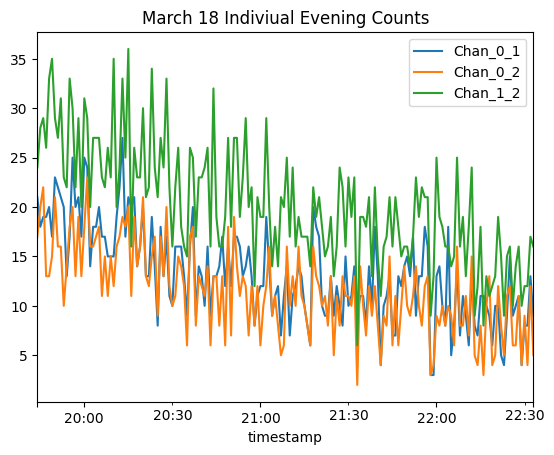

In [28]:
df_even_counts.plot()
plt.title('March 18 Indiviual Evening Counts')

In [29]:
df_even_counts['average'] = df_even_counts[['Chan_0_1', 'Chan_0_2', 'Chan_1_2']].mean(axis=1)
df_even_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2,average
timestamp,,,,
2023-03-18 19:44:00,21.0,17.0,24.0,20.666667
2023-03-18 19:45:00,18.0,20.0,28.0,22.000000
2023-03-18 19:46:00,19.0,22.0,29.0,23.333333
2023-03-18 19:47:00,19.0,13.0,26.0,19.333333
2023-03-18 19:48:00,20.0,13.0,33.0,22.000000


Text(0.5, 1.0, 'March 18 Evening Individual and Average Counts')

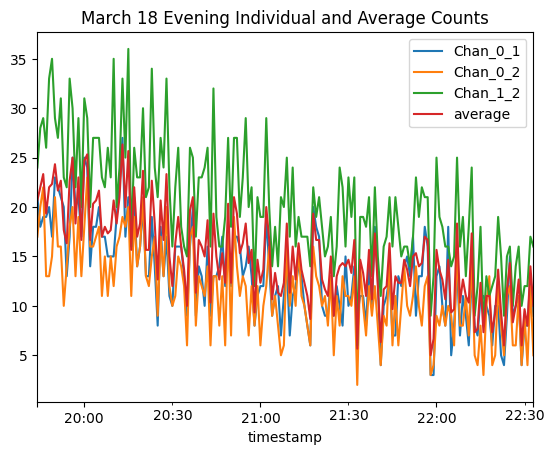

In [30]:
df_even_counts.plot()
plt.title('March 18 Evening Individual and Average Counts')

Text(0.5, 1.0, 'March 18 Evening Average Counts')

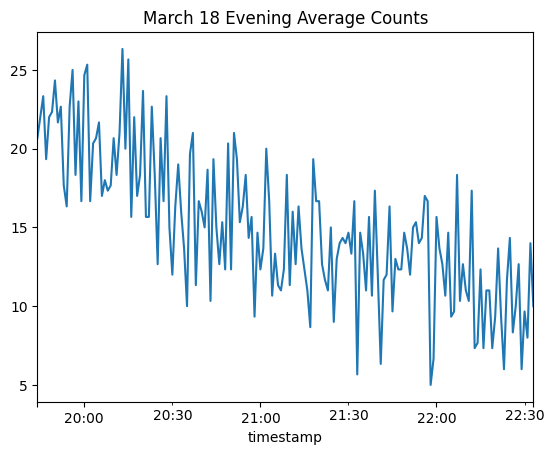

In [31]:
df_even_counts['average'].plot()
plt.title('March 18 Evening Average Counts')

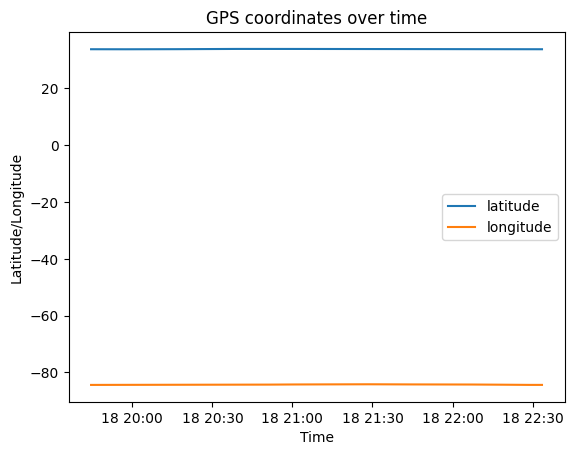

In [17]:
# extract the latitude, longitude, and time columns
lat = df_even['Latitude']
lon = df_even['Longitude']
time = df_even['timestamp']

# plot the latitude and longitude against time
plt.plot(time, lat, label='latitude')
plt.plot(time, lon, label='longitude')

# set the x-axis label
plt.xlabel('Time')

# set the y-axis labels
plt.ylabel('Latitude/Longitude')

# set the title
plt.title('GPS coordinates over time')

# add a legend
plt.legend()

# display the plot
plt.show()